<h1 ><big><center>Object recognition and computer vision 2019/2020</center></big></h1>

<h3><big><center><a href="http://www.di.ens.fr/~ponce/">Jean Ponce</a>, <a href="http://www.di.ens.fr/~laptev/">Ivan Laptev</a>, <a href="http://lear.inrialpes.fr/~schmid/">Cordelia Schmid</a> and <a href="http://www.di.ens.fr/~josef/">Josef Sivic</a></center></big></h3>


<h2><big><center> Assignment 2: Neural networks</center></big></h2>

<h5><big><center>Adapted from practicals from <a href="http://nicolas.le-roux.name/">Nicolas le Roux</a>, 
  <br><a href="http://www.robots.ox.ac.uk/~vgg/practicals/overview/index.html">Andrea Vedaldi and Andrew Zisserman</a> and <a href="https://cs.nyu.edu/~fergus/teaching/vision/">Rob Fergus</a>
  <br> by <a href="https://www.di.ens.fr/~varol/">Gul Varol</a> and <a href="https://www.di.ens.fr/~iroccosp/">Ignacio Rocco</a></center></big></h5>


</br>

<p align="center">
<img height=300px src="http://www.di.ens.fr/willow/teaching/recvis_orig/assignment3/images/fullyconn.png"/></p>
<p align="center">Figure 1</p>
<p align="center"></p>

**STUDENT**:  Ghassen BETTAIEB

**EMAIL**:  ghassen.bettaieb@ens-paris-saclay.fr

# Guidelines

The purpose of this assignment is that you get hands-on experience with the topics covered in class, which will help you understand these topics better. Therefore, ** it is imperative that you do this assignment yourself. No code sharing will be tolerated. **

Once you have completed the assignment, you will submit the `ipynb` file containing **both** code and results. For this, make sure to **run your notebook completely before submitting**.

The `ipynb` must be named using the following format: **A2_LASTNAME_Firstname.ipynb**, and submitted in the **class Moodle page**.

# Goal


The goal of this assignment is to get basic knowledge and hands-on experience with training and using neural networks. In Part 1 of the assignment you will implement and experiment with the training and testing of a simple two layer fully-connected neural network, similar to the one depicted in Figure 1 above. In Part 2 you will learn about convolutional neural networks, their motivation, building blocks, and how they are trained. Finally, in part 3 you will train a CNN for classification using the CIFAR-10 dataset.

# Part 1 - Training a fully connected neural network

## Getting started

You will be working with a two layer neural network of the following form 

\begin{equation}
H=\text{ReLU}(W_i X+B_i)\\
Y=W_oH+B_o
\tag{1}
\end{equation}

where $X$ is the input, $Y$ is the output, $H$ is the hidden layer, and $W_i$, $W_o$, $B_i$ and $B_o$ are the network parameters that need to be trained. Here the subscripts $i$ and $o$ stand for the *input* and *output* layer, respectively. This network was also discussed in the class and is illustrated in the above figure where the input units are shown in green, the hidden units in blue and the output in yellow. This network is implemented in the function `nnet_forward_logloss`.

You will train the parameters of the network from labelled training data $\{X^n,Y^n\}$ where $X^n$ are points in $\mathbb{R}^2$ and $Y^n\in\{-1,1\}$ are labels for each point. You will use the stochastic gradient descent algorithm discussed in the class to minimize the loss of the network on the training data given by 

\begin{equation}
L=\sum_n s(Y^n,\bar{Y}(X^n))
\tag{2}
\end{equation}

where $Y^n$ is the target label for the n-th example and $\bar{Y}(X^n)$ is the network’s output for the n-th example $X^n$. The skeleton of the training procedure is provided in the `train_loop` function. 

We will use the logistic loss, which has the following form:

\begin{equation}
s(Y, \bar{Y}(X))=\log(1+\exp(-Y. \bar{Y}(X))
\tag{3}
\end{equation}

where $Y$ is the target label and $\bar{Y}(X)$ is the output of the network for input example $X$. With the logistic loss, the output of the network can be interpreted as a probability $P(\text{class}=1|X) =\sigma(X)$ , where $\sigma(X) =1/(1+\exp(-X))$ is the sigmoid function. Note also that $P(\text{class}=-1|X)=1-P(\text{class}=1|X)$.

In [ ]:
from IPython import display
import matplotlib.pyplot as plt
import numpy as np
import scipy.io as sio


def decision_boundary_nnet(X, Y, Wi, bi, Wo, bo):
    x_min, x_max = -2, 4
    y_min, y_max = -5, 3
    xx, yy = np.meshgrid(np.arange(x_min, x_max, .05),
                     np.arange(y_min, y_max, .05))

    XX = np.vstack((xx.ravel(), yy.ravel())).T
    input_hidden = np.dot(XX, Wi) + bi
    hidden = np.maximum(input_hidden, 0)
    Z = np.dot(hidden, Wo) + bo

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z > 0, cmap=plt.cm.Paired)
    plt.axis('off')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap='winter')
    plt.axis([-2, 4, -5, 3])
    plt.draw()


def sigm(x):
    # Returns the sigmoid of x.
    small_x = np.where(x < -20)  # Avoid overflows.
    sigm_x = 1/(1 + np.exp(-x))
    if type(sigm_x) is np.ndarray:
        sigm_x[small_x] = 0.0
    return sigm_x


def nnet_forward_logloss(X, Y, Wi, bi, Wo, bo):
    '''
    Compute the output Po, Yo and the loss of the network for the input X
    This is a 2 layer (1 hidden layer network)

    Input:
        X ... (in R^2) set of input points, one per column
        Y ... {-1,1} the target values for the set of points X
        Wi, bi, Wo, bo ... parameters of the network

    Output: 
       Po ... probabilisitc output of the network P(class=1 | x) 
                  Po is in <0 1>. 
                  Note: P(class=-1 | x ) = 1 - Po
       Yo ... output of the network Yo is in <-inf +inf>
       loss ... logistic loss of the network on examples X with ground target
                    values Y in {-1,1}
    '''
    # Hidden layer
    hidden = np.maximum(np.dot(X, Wi) + bi, 0)
    # Output of the network
    Yo = np.dot(hidden, Wo) + bo
    # Probabilistic output
    Po = sigm(Yo)
    # Logistic loss
    loss = np.log(1 + np.exp( -Y * Yo)) 
    return Po, Yo, loss


# Load the training data
!wget -q http://www.di.ens.fr/willow/teaching/recvis_orig/assignment2/double_moon_train1000.mat
train_data = sio.loadmat('./double_moon_train1000.mat', squeeze_me=True)
Xtr = train_data['X']
Ytr = train_data['Y']
# Load the validation data
!wget -q http://www.di.ens.fr/willow/teaching/recvis_orig/assignment2/double_moon_val1000.mat
val_data = sio.loadmat('./double_moon_val1000.mat', squeeze_me=True)
Xval = val_data['X']
Yval = val_data['Y']

## Computing gradients of the loss with respect to network parameters 

### :: TASK 1.1 ::
Derive the form of the gradient of the logistic loss (3) with respect to the parameters of the network $W_i$, $W_o$, $B_i$ and $B_o$.  *Hint:* Use the chain rule as discussed in the class.

######################

Using the chain rule we get :
$$
\left\{
    \begin{array}{ll}
    \frac{\partial s(Y,\bar{Y})}{\partial W_i} = \frac{\partial s(Y,\bar{Y})}{\partial \bar Y}.\frac{\partial \bar Y}{\partial H} . \frac{\partial H}{\partial W_i}\\
        \frac{\partial s(Y,\bar{Y})}{\partial B_i} = \frac{\partial s(Y,\bar{Y})}{\partial \bar Y}.\frac{\partial \bar Y}{\partial H} . \frac{\partial H}{\partial B_i} \\
        \frac{\partial s(Y,\bar{Y})}{\partial W_o} = \frac{\partial s(Y,\bar{Y})}{\partial \bar Y}.\frac{\partial \bar Y}{\partial W_o} \\
          \frac{\partial s(Y,\bar{Y})}{\partial B_o} = \frac{\partial s(Y,\bar{Y})}{\partial \bar Y}.\frac{\partial \bar Y}{\partial B_o}
    \end{array}
\right.
$$
We calculate some of simple intermediate derivates. We also give the formula derivative of $ReLU$ with respect to a matrix:

$$
\left\{
    \begin{array}{ll}
    \frac{\partial s(Y,\bar{Y})}{\partial \bar Y} = \frac{-Y.\exp(-Y.\bar Y)}{1 + \exp (-Y.\bar Y)}\\
    (Relu)^{'}(U) = (\mathbb{1}_{U_{n,m} > 0})_{n,m}  
    \end{array}
\right.
$$
We alse define the Hadamard product for two matrices $A$ and $B$ of same dimension $m$x$n$ as follow:
$$
(A\odot B)_{i,j} = A_{i,j}.B_{i,j}
$$

Finally we get:

$$
\left\{
    \begin{array}{ll}
    \frac{\partial s(Y,\bar{Y})}{\partial W_i} = \frac{-Y.\exp(-Y.\bar Y)}{1 + \exp (-Y.\bar Y)}.X.((Relu)^{'}(W_i X+B_i)^{T}\odot W_0^{T})\\
        \frac{\partial s(Y,\bar{Y})}{\partial B_i} = \frac{-Y.\exp(-Y.\bar Y)}{1 + \exp (-Y.\bar Y)}.((Relu)^{'}(W_i X+B_i)\odot W_0)\\
        \frac{\partial s(Y,\bar{Y})}{\partial W_o} = \frac{-Y.\exp(-Y.\bar Y)}{1 + \exp (-Y.\bar Y)}.H \\
          \frac{\partial s(Y,\bar{Y})}{\partial B_o} = \frac{-Y.\exp(-Y.\bar Y)}{1 + \exp (-Y.\bar Y)}*1
    \end{array}
\right.
$$
######################

### :: TASK 1.2 ::

Following your derivation, implement the gradient computation in the function `gradient_nn`. See the code for the description of the required inputs / outputs of this function.

In [ ]:
def gradient_nn(X, Y, Wi, bi, Wo, bo):
    '''
    Compute gradient of the logistic loss of the neural network on example X with
    target label Y, with respect to the parameters Wi,bi,Wo,bo.

    Input:
        X ... 2d vector of the input example
        Y ... the target label in {-1,1}   
        Wi,bi,Wo,bo ... parameters of the network
        Wi ... [dxh]
        bi ... [h]
        Wo ... [h]
        bo ... 1
        where h... is the number of hidden units
              d... is the number of input dimensions (d=2)

    Output: 
        grad_s_Wi [dxh] ... gradient of loss s(Y,Y(X)) w.r.t  Wi
        grad_s_bi [h]   ... gradient of loss s(Y,Y(X)) w.r.t. bi
        grad_s_Wo [h]   ... gradient of loss s(Y,Y(X)) w.r.t. Wo
        grad_s_bo 1     ... gradient of loss s(Y,Y(X)) w.r.t. bo
    '''
 
    #hidden 
    H = (X@Wi+bi)*(X@Wi+bi>0)
    Y_pred = H.dot(Wo) + bo
    
    #derivate of loss with respect to y
    ds_dy = -np.exp(-Y*Y_pred)*Y/(1 + np.exp(-Y*Y_pred))
    
    #compute the two first easiests gradients
    grad_s_bo = 1 * ds_dy
    grad_s_Wo = ds_dy * H
    
    #compute intermediate derivative to be used after
    derivative_term = ds_dy*Wo
    derivative_term = derivative_term*(X@Wi+bi>0)
    #compute the two remaining derivatives
    grad_s_bi = derivative_term
    grad_s_Wi = X.reshape(2,1)@(derivative_term.reshape(1,len(derivative_term)))
    return (grad_s_Wi, grad_s_bi, grad_s_Wo, grad_s_bo)

  

## Numerically verify the gradients
Here you will numerically verify that your analytically computed gradients in function `gradient_nn` are correct. 

### :: TASK 1.3 ::
Write down the general formula for numerically computing the approximate derivative of the loss $s(\theta)$, with respect to the parameter $\theta_i$ using finite differencing.  *Hint: use the first order Taylor expansion of loss $s(\theta+\Delta \theta)$ around point $\theta$. *


$$  \frac {\partial{s}}{\partial \theta} = \frac {s(\theta+\Delta \theta) - s(\theta)}{2.\Delta \theta} 
$$

Following the general formula, `gradient_nn_numerical` function numerically computes the derivatives of the loss function with respect to all the parameters of the network $W_i$, $W_o$, $B_i$ and $B_o$:

In [ ]:
def gradient_nn_numerical(X, Y, Wi, bi, Wo, bo):
    '''
    Compute numerical gradient of the logistic loss of the neural network on
    example X with target label Y, with respect to the parameters Wi,bi,Wo,bo.

    Input:
       X ... 2d vector of the input example
       Y ... the target label in {-1,1}   
       Wi, bi, Wo, bo ... parameters of the network
       Wi ... [dxh]
       bi ... [h]
       Wo ... [h]
       bo ... 1
       where h... is the number of hidden units
             d... is the number of input dimensions (d=2)

    Output: 
       grad_s_Wi_numerical [dxh] ... gradient of loss s(Y,Y(X)) w.r.t  Wi
       grad_s_bi_numerical [h]   ... gradient of loss s(Y,Y(X)) w.r.t. bi
       grad_s_Wo_numerical [h]   ... gradient of loss s(Y,Y(X)) w.r.t. Wo
       grad_s_bo_numerical 1     ... gradient of loss s(Y,Y(X)) w.r.t. bo
    '''

    eps = 1e-8
    grad_s_Wi_numerical = np.zeros(Wi.shape)
    grad_s_bi_numerical = np.zeros(bi.shape)
    grad_s_Wo_numerical = np.zeros(Wo.shape)

    for i in range(Wi.shape[0]):
        for j in range(Wi.shape[1]):
            dummy, dummy, pos_loss = nnet_forward_logloss(X, Y, sumelement_matrix(Wi, i, j, +eps), bi, Wo, bo)
            dummy, dummy, neg_loss = nnet_forward_logloss(X, Y, sumelement_matrix(Wi, i, j, -eps), bi, Wo, bo)
            grad_s_Wi_numerical[i, j] = (pos_loss - neg_loss)/(2*eps)

    for i in range(bi.shape[0]):
        dummy, dummy, pos_loss = nnet_forward_logloss(X, Y, Wi, sumelement_vector(bi, i, +eps), Wo, bo)
        dummy, dummy, neg_loss = nnet_forward_logloss(X, Y, Wi, sumelement_vector(bi, i, -eps), Wo, bo)
        grad_s_bi_numerical[i] = (pos_loss - neg_loss)/(2*eps)

    for i in range(Wo.shape[0]):
        dummy, dummy, pos_loss = nnet_forward_logloss(X, Y, Wi, bi, sumelement_vector(Wo, i, +eps), bo)
        dummy, dummy, neg_loss = nnet_forward_logloss(X, Y, Wi, bi, sumelement_vector(Wo, i, -eps), bo)
        grad_s_Wo_numerical[i] = (pos_loss - neg_loss)/(2*eps)

    dummy, dummy, pos_loss = nnet_forward_logloss(X, Y, Wi, bi, Wo, bo+eps)
    dummy, dummy, neg_loss = nnet_forward_logloss(X, Y, Wi, bi, Wo, bo-eps)
    grad_s_bo_numerical = (pos_loss - neg_loss)/(2*eps)

    return grad_s_Wi_numerical, grad_s_bi_numerical, grad_s_Wo_numerical, grad_s_bo_numerical


def sumelement_matrix(X, i, j, element):
    Y = np.copy(X)
    Y[i, j] = X[i, j] + element
    return Y


def sumelement_vector(X, i, element):
    Y = np.copy(X)
    Y[i] = X[i] + element
    return Y

### :: TASK 1.4 ::

Run the following code snippet and understand what it is doing. `gradcheck` function checks that the analytically computed derivative using function `gradient_nn` (e.g. `grad_s_bo`) at the same training example $\{X,Y\}$ is the same (up to small errors) as your numerically computed value of the derivative using function `gradient_nn_numerical` (e.g. `grad_s_bo_numerical`). Make sure the output is `SUCCESS` to move on to the next task.

In [ ]:
def gradcheck():
    '''
    Check that the numerical and analytical gradients are the same up to eps
    '''
    h = 3 # number of hidden units
    eps = 1e-6
    for i in range(1000):
        # Generate random input/output/weight/bias
        X  = np.random.randn(2)
        Y  = 2* np.random.randint(2) - 1 # {-1, 1}
        Wi = np.random.randn(X.shape[0], h)
        bi = np.random.randn(h)
        Wo = np.random.randn(h)
        bo = np.random.randn(1)
        # Compute analytical gradients
        grad_s_Wi, grad_s_bi, grad_s_Wo, grad_s_bo = gradient_nn(X, Y, Wi, bi, Wo, bo)
        # Compute numerical gradients
        grad_s_Wi_numerical, grad_s_bi_numerical, grad_s_Wo_numerical, grad_s_bo_numerical = gradient_nn_numerical(X, Y, Wi, bi, Wo, bo)
        # Compute the difference between analytical and numerical gradients
        delta_Wi = np.mean(np.abs(grad_s_Wi - grad_s_Wi_numerical))
        delta_bi = np.mean(np.abs(grad_s_bi - grad_s_bi_numerical))
        delta_Wo = np.mean(np.abs(grad_s_Wo - grad_s_Wo_numerical))
        delta_bo = np.abs(grad_s_bo - grad_s_bo_numerical)
        # Difference larger than a threshold
        if ( delta_Wi > eps or delta_bi > eps or delta_Wo > eps or delta_bo > eps):
            return False

    return True 


# Check gradients
if gradcheck():
    print('SUCCESS: Passed gradcheck.')
else:
    print('FAILURE: Fix gradient_nn and/or gradient_nn_aprox implementation.')

SUCCESS: Passed gradcheck.


## Training the network using backpropagation and experimenting with different parameters

Use the provided code below that calls the `train_loop` function. Set the number of hidden units to 7 by setting $h=7$ in the code and set the learning rate to 0.02 by setting `lrate = 0.02`. Run the training code. Visualize the trained hyperplane using the provided function `plot_decision_boundary(Xtr,Ytr,Wi,bi,Wo,bo)`. Show also the evolution of the training and validation errors. Include the decision hyper-plane visualization and the training and validation error plots.

In [ ]:
def train_loop(Xtr, Ytr, Xval, Yval, h, lrate, vis='all', nEpochs=100):
    '''
    Check that the numerical and analytical gradients are the same up to eps

    Input:
        Xtr ... Nx2 matrix of training samples
        Ytr ... N dimensional vector of training labels
        Xval ... Nx2 matrix of validation samples 
        Yval ... N dimensional vector validation labels
        h ... number of hidden units
        lrate ... learning rate
        vis ... visulaization option ('all' | 'last' | 'never')
        nEpochs ... number of training epochs

    Output:
        tr_error ... nEpochs*nSamples dimensional vector of training error
        val_error ... nEpochs*nSamples dimensional vector of validation error
    '''

    nSamples = Xtr.shape[0]
    tr_error = np.zeros(nEpochs*nSamples)
    val_error = np.zeros(nEpochs*nSamples)

    # Randomly initialize parameters of the model
    Wi = np.random.randn(Xtr.shape[1], h)
    Wo = np.zeros(h)
    bi = np.zeros(h)
    bo = 0.

    if(vis == 'all' or vis == 'last'):
        plt.figure()

    for i in range(nEpochs*nSamples):
        # Draw an example at random
        n = np.random.randint(nSamples)
        X = Xtr[n]
        Y = Ytr[n]

        # Compute gradient 
        grad_s_Wi, grad_s_bi, grad_s_Wo, grad_s_bo = gradient_nn(X, Y, Wi, bi, Wo, bo)

        # Gradient update
        Wi -= lrate*grad_s_Wi
        Wo -= lrate*grad_s_Wo
        bi -= lrate*grad_s_bi
        bo -= lrate*grad_s_bo

        # Compute training error
        Po, Yo, loss    = nnet_forward_logloss(Xtr, Ytr, Wi, bi, Wo, bo)
        Yo_class        = np.sign(Yo)
        tr_error[i]     = 100*np.mean(Yo_class != Ytr)

        # Compute validation error
        Pov, Yov, lossv = nnet_forward_logloss(Xval, Yval, Wi, bi, Wo, bo)
        Yov_class       = np.sign(Yov)
        val_error[i]    = 100*np.mean(Yov_class != Yval)

        # Plot (at every epoch if visualization is 'all', only at the end if 'last')
        if(vis == 'all' and i%nSamples == 0) or (vis == 'last' and i == nEpochs*nSamples - 1):
            # Draw the decision boundary.
            plt.clf()
            plt.title('p = %d, Iteration = %.d, Error = %.3f' % (h, i/nSamples, tr_error[i]))
            decision_boundary_nnet(Xtr, Ytr, Wi, bi, Wo, bo)
            display.display(plt.gcf(), display_id=True)
            display.clear_output(wait=True)

    if(vis == 'all'):
        # Plot the evolution of the training and test errors
        plt.figure()
        plt.plot(tr_error, label='training')
        plt.plot(val_error, label='validation')
        plt.legend()
        plt.title('Training/validation errors: %.2f%% / %.2f%%' % (tr_error[-1], val_error[-1]))
    return tr_error, val_error

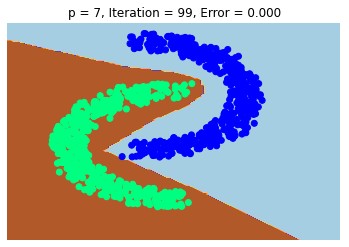

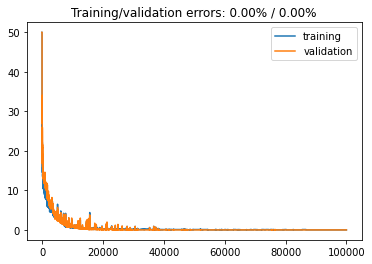

In [ ]:
# Run training
h = 7
lrate = .02
tr_error, val_error = train_loop(Xtr, Ytr, Xval, Yval, h, lrate)

### :: TASK 1.6 ::

**Random initializations.** Repeat this procedure 5 times from 5 different random initializations. Record for each run the final training and validation errors. Did the network always converge to zero training error? Summarize your final training and validation errors into a table for the 5 runs. You do not need to include the decision hyper-plane visualizations. Note: to speed-up the training you can plot the visualization figures less often (or never) and hence speed-up the training.

In [ ]:
h = 7
lrate = .02

tr_errors = []
val_errors = []

# change the procedure 5 times
for i in range(10):
    tr_error, val_error = train_loop(Xtr, Ytr, Xval, Yval, h, lrate, vis = 'never')
    tr_errors.append(tr_error[-1])
    val_errors.append(val_error[-1])

In [ ]:
print("Training error at the last iteration :")
print(" # ".join(map(str, tr_errors)))
print("Validation error at the last iteration :")
print(" # ".join(map(str, val_errors)))

Training error at the last iteration :
0.0 # 0.0 # 0.0 # 0.0 # 0.0 # 0.0 # 0.0 # 0.0 # 0.0 # 0.0
Validation error at the last iteration :
0.0 # 0.0 # 0.0 # 0.0 # 0.0 # 0.0 # 0.0 # 0.0 # 0.0 # 0.0


######################

It seems that the training error and validation does not depend on the random initialization of the model's parameters, as it always converges to zero. There is no overfitting as the validation error converges to zero as well. <br> This may be explained by the fact that the model is simple and not very complex (7 hidden units) and is adapted to the simple task of binary classification. So the model converges to the loss minima independently from the initialization.

######################

### :: SAMPLE TASK ::

For this task, the answer is given. Run the given code and answer Task 1.8 similarly.

**Learning rate:**

Keep $h=7$ and change the learning rate to values $\text{lrate} = \{2, 0.2, 0.02, 0.002\}$. For each of these values run the training procedure 5 times and observe the training behaviour. You do not need to include the decision hyper-plane visualizations in your answer.

**- Make one figure** where *final* error for (i) training and (ii) validation sets are superimposed. $x$-axis should be the different values of the learning rate, $y$-axis the error *mean* across 5 runs. Show the standard deviation with error bars and make sure to label each plot with a legend.

**- Make another figure** where *training error evolution* for each learning rate is superimposed. $x$-axis should be the iteration number, $y$-axis the training error *mean* across 5 runs for a given learning rate. Show the standard deviation with error bars and make sure to label each curve with a legend.

In [ ]:
nEpochs = 40
trials = 5
lrates = [2, 0.2, 0.02, 0.002]
plot_data_lr = np.zeros((2, trials, len(lrates), nEpochs*1000))
h = 7
for j, lrate in enumerate(lrates):
    print('LR = %f' % lrate)
    for i in range(trials):
        tr_error, val_error = train_loop(Xtr, Ytr, Xval, Yval, h, lrate, vis='never', nEpochs=nEpochs)
        plot_data_lr[0, i, j, :] = tr_error
        plot_data_lr[1, i, j, :] = val_error

LR = 2.000000


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:63: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: overflow encountered in exp
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:33: RuntimeWarning: invalid value encountered in double_scalars
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:31: RuntimeWarning: invalid value encountered in less
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in greater


LR = 0.200000
LR = 0.020000
LR = 0.002000


Text(0, 0.5, 'training error')

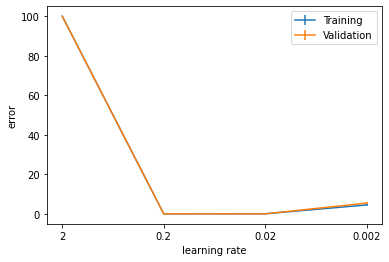

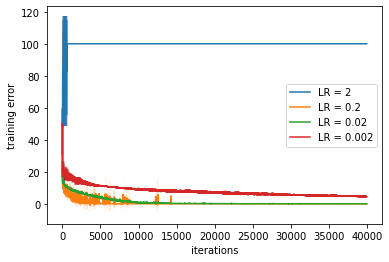

In [ ]:
plt.errorbar(np.arange(len(lrates)), plot_data_lr[0, :, :, -1].mean(axis=0), yerr=plot_data_lr[0, :, :, -1].std(axis=0), label='Training')
plt.errorbar(np.arange(len(lrates)), plot_data_lr[1, :, :, -1].mean(axis=0), yerr=plot_data_lr[0, :, :, -1].std(axis=0), label='Validation')
plt.xticks(np.arange(len(lrates)), lrates)
plt.xlabel('learning rate')
plt.ylabel('error')
plt.legend()

# Plot the evolution of the training loss for each learning rate
plt.figure()
for j, lrate in enumerate(lrates):
    x = np.arange(plot_data_lr.shape[3])
    # Mean training loss over trials
    y = plot_data_lr[0, :, j, :].mean(axis=0)
    # Standard deviation over trials
    ebar = plot_data_lr[0, :, j, :].std(axis=0)
    # Plot
    markers, caps, bars = plt.errorbar(x, y, yerr=ebar, label='LR = ' + str(lrate))
    # Make the error bars transparent
    [bar.set_alpha(0.01) for bar in bars]
plt.legend()
plt.xlabel('iterations')
plt.ylabel('training error')

### :: TASK 1.7 ::

**- Briefly discuss** the different behaviour of the training for different learning rates. How many iterations does it take to converge or does it converge at all? Which learning rate is  better and why?

######################

The learning rate controls how the parameters are updated at each iteration after computing the gradient.
In other words the learning rates controls how the model is adapted to the problem.
- If the learning rate is too small (LR = 0.002), the changes of the model parameters values at each update are too small. Hence, it takes many iterations for the model to converge to the optimal solution. For LR = 0.002, after 40 000 iterations the model do not converge to zero and is still decreasing.
- If the learning rate is too large (LR = 2), the changes of the parameters values at each update are too important. As a result, the model converges to a suboptimal solution very quickly (after few iterations) and then the training error increases (stuck at training error = 100)
- For LR=0.2 and LR=0.02, the model converges to zero quickly. However for LR=0.2, the training error is noisy and oscillating before its convergence to zero which might lead to escaping the global minima. For LR=0.02 the training error converges to zero quickly without any noise. <br>

**conlusion**
LR=0.02 is the better choice as it is a good trade-off between convergence speed and absence of noise.

######################

### :: TASK 1.8 ::
**The number of hidden units:**

Set the learning rate to 0.02 and change the number of hidden units $h = \{1, 2, 5, 7, 10, 100\}$. For each of these values run the training procedure 5 times and observe the training behaviour

**-Visualize** one decision hyper-plane per number of hidden units.

**-Make one figure** where *final* error for (i) training and (ii) validation sets are superimposed. $x$-axis should be the different values of the number of hidden units, $y$-axis the error *mean* across 5 runs. Show the standard deviation with error bars and make sure to label each plot with a legend.

**-Make another figure** where *training error evolution* for each number of hidden units is superimposed. $x$-axis should be the iteration number, $y$-axis the training error *mean* across 5 runs for a given learning rate. Show the standard deviation with error bars and make sure to label each curve with a legend.

**-Briefly discuss** the different behaviours for the different numbers of hidden units.

In [ ]:
nEpochs = 40
trials = 5
lrate = 0.02
h_candidates = [1, 2, 5, 7, 10, 100]
plot_data_h = np.zeros((2, trials, len(h_candidates), nEpochs*1000))
for j, h in enumerate(h_candidates):
    print('h = %f' % h)
    for i in range(trials):
        tr_error, val_error = train_loop(Xtr, Ytr, Xval, Yval, h, lrate, vis='never', nEpochs=nEpochs)
        plot_data_h[0, i, j, :] = tr_error
        plot_data_h[1, i, j, :] = val_error

h = 1.000000
h = 2.000000
h = 5.000000
h = 7.000000
h = 10.000000
h = 100.000000


Text(0, 0.5, 'training error')

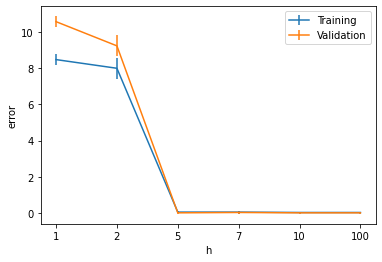

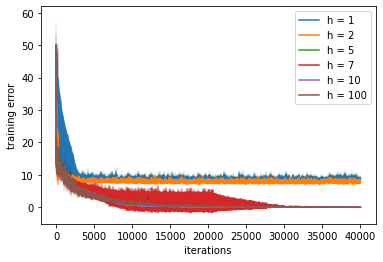

In [ ]:
plt.errorbar(np.arange(len(h_candidates)), plot_data_h[0, :, :, -1].mean(axis=0), yerr=plot_data_h[0, :, :, -1].std(axis=0), label='Training')
plt.errorbar(np.arange(len(h_candidates)), plot_data_h[1, :, :, -1].mean(axis=0), yerr=plot_data_h[0, :, :, -1].std(axis=0), label='Validation')
plt.xticks(np.arange(len(h_candidates)), h_candidates)
plt.xlabel('h')
plt.ylabel('error')
plt.legend()

# Plot the evolution of the training loss for each learning rate
plt.figure()
for j, h in enumerate(h_candidates):
    x = np.arange(plot_data_h.shape[3])
    # Mean training loss over trials
    y = plot_data_h[0, :, j, :].mean(axis=0)
    # Standard deviation over trials
    ebar = plot_data_h[0, :, j, :].std(axis=0)
    # Plot
    markers, caps, bars = plt.errorbar(x, y, yerr=ebar, label='h = ' + str(h))
    # Make the error bars transparent
    [bar.set_alpha(0.01) for bar in bars]
plt.legend()
plt.xlabel('iterations')
plt.ylabel('training error')

######################

- If the number of hidden units is small (**h=1** or **h=2**), the model complexity is too simple to represent the problem and to optimally fit the data, hence it is under-fitting the data. 
- For larger value for number of hiedden units **h=7,10,100** the training and validation errors converge to zero. For **h=7** the training error is very noisy which might lead to escaping the global minima. For **h=100** the model takes a very long time to converge compared to the other number of hidden units.
- **h=10** is the better choice because the training/validation error converge to zero quicker without much noise on the training error (a good trade-off)

######################

# Part 2 - Building blocks of a CNN

This part introduces typical CNN building blocks, such as ReLU units and linear filters. For a motivation for using CNNs over fully-connected neural networks, see [[Le Cun, et al, 1998]](http://yann.lecun.com/exdb/publis/pdf/lecun-01a.pdf).


## Install PyTorch

In [ ]:
!pip install torch torchvision
import torch
print(torch.__version__)
print(torch.cuda.is_available())

1.7.0+cu101
True


## Convolution

A feed-forward neural network can be thought of as the composition of number of functions 
$$
f(\mathbf{x}) = f_L(\dots f_2(f_1(\mathbf{x};\mathbf{w}_1);\mathbf{w}_2)\dots),\mathbf{w}_{L}).
$$
Each function $f_l$ takes as input a datum $\mathbf{x}_l$ and a parameter vector $\mathbf{w}_l$ and produces as output a datum $\mathbf{x}_{l+1}$. While the type and sequence of functions is usually handcrafted, the parameters $\mathbf{w}=(\mathbf{w}_1,\dots,\mathbf{w}_L)$ are *learned from data* in order to solve a target problem, for example classifying images or sounds.

In a *convolutional neural network* data and functions have additional structure. The data $\mathbf{x}_1,\dots,\mathbf{x}_n$ are images, sounds, or more in general maps from a lattice$^1$ to one or more real numbers. In particular, since the rest of the practical will focus on computer vision applications, data will be 2D arrays of pixels. Formally, each $\mathbf{x}_i$ will be a $M \times N \times K$ real array of $M \times N$ pixels and $K$ channels per pixel. Hence the first two dimensions of the array span space, while the last one spans channels. Note that only the input $\mathbf{x}=\mathbf{x}_1$ of the network is an actual image, while the remaining data are intermediate *feature maps*.

The second property of a CNN is that the functions $f_l$ have a *convolutional structure*. This means that $f_l$ applies to the input map $\mathbf{x}_l$ an operator that is *local and translation invariant*. Examples of convolutional operators are applying a bank of linear filters to $\mathbf{x}_l$. 

In this part we will familiarise ourselves with a number of such convolutional and non-linear operators. The first one is the regular *linear convolution* by a filter bank. We will start by focusing our attention on a single function relation as follows:
$$
 f: \mathbb{R}^{M\times N\times K} \rightarrow \mathbb{R}^{M' \times N' \times K'},
 \qquad \mathbf{x} \mapsto \mathbf{y}.
$$

$^1$A two-dimensional *lattice* is a discrete grid embedded in $R^2$, similar for example to a checkerboard.

(384, 512, 3)


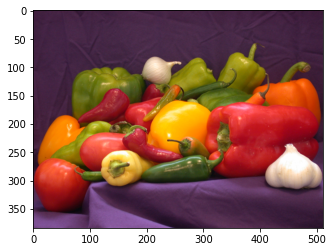

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image
import torch
import torchvision

# Download an example image
!wget -q http://www.di.ens.fr/willow/teaching/recvis_orig/assignment3/images/peppers.png
# Read the image 
x = np.asarray(Image.open('peppers.png'))/255.0
# Print the size of x. Third dimension (=3) corresponds to the R, G, B channels
print(x.shape)
# Visualize the input x
plt.imshow(x)
# Convert to torch tensor
x = torch.from_numpy(x).permute(2, 0, 1).float()
# Prepare it as a batch
x = x.unsqueeze(0)

This should display an image of bell peppers.

Next, we create a convolutional layer with a bank of 10 filters of dimension $5 \times 5 \times 3$ whose coefficients are initialized randomly. This uses the [`torch.nn.Conv2d`](https://pytorch.org/docs/stable/nn.html#torch.nn.Conv2d) module from PyTorch:

In [ ]:
# Create a convolutional layer and a random bank of linear filters
conv = torch.nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=0, bias=False)
print(conv.weight.size())

torch.Size([10, 3, 5, 5])


**Remark:** You might have noticed that the `bias` argument to the `torch.nn.Conv2d` function is the empty matrix `false`. It can be otherwise used to pass a vector of bias terms to add to the output of each filter.

Note that `conv.weight` has four dimensions, packing 10 filters. Note also that each filter is not flat, but rather a volume containing three slices. The next step is applying the filter to the image.

In [ ]:
# Apply the convolution operator
y = conv(x)
# Observe the input/output sizes
print(x.size())
print(y.size())

torch.Size([1, 3, 384, 512])
torch.Size([1, 10, 380, 508])


The variable `y` contains the output of the convolution. Note that the filters are three-dimensional. This is because they operate on a tensor $\mathbf{x}$ with $K$ channels. Furthermore, there are $K'$ such filters, generating a $K'$ dimensional map $\mathbf{y}$.

We can now visualise the output `y` of the convolution. In order to do this, use the `torchvision.utils.make_grid` function to display an image for each feature channel in `y`:

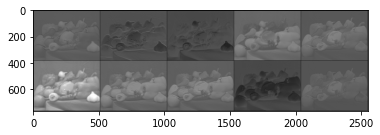

In [ ]:
# Visualize the output y
def vis_features(y):
    # Organize it into 10 grayscale images
    out = y.permute(1, 0, 2, 3)
    # Scale between [0, 1]
    out = (out - out.min().expand(out.size())) / (out.max() - out.min()).expand(out.size())
    # Create a grid of images
    out = torchvision.utils.make_grid(out, nrow=5)
    # Convert to numpy image
    out = np.transpose(out.detach().numpy(), (1, 2, 0))
    # Show
    plt.imshow(out)
    # Remove grid
    plt.gca().grid(False)

vis_features(y)

So far filters preserve the resolution of the input feature map. However, it is often useful to *downsample the output*. This can be obtained by using the `stride` option in `torch.nn.Conv2d`:

torch.Size([1, 3, 384, 512])
torch.Size([1, 10, 24, 32])


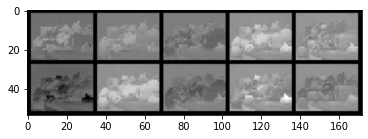

In [ ]:
# Try again, downsampling the output
conv_ds = torch.nn.Conv2d(3, 10, kernel_size=5, stride=16, padding=0, bias=False)
y_ds = conv_ds(x)
print(x.size())
print(y_ds.size())
vis_features(y_ds)

Applying a filter to an image or feature map interacts with the boundaries, making the output map smaller by an amount proportional to the size of the filters. If this is undesirable, then the input array can be padded with zeros by using the `pad` option:

torch.Size([1, 3, 384, 512])
torch.Size([1, 10, 384, 512])


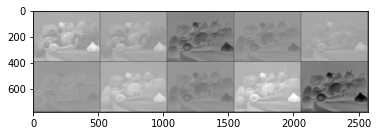

In [ ]:
# Try padding
conv_pad = torch.nn.Conv2d(3, 10, kernel_size=5, stride=1, padding=2, bias=False)
y_pad = conv_pad(x)
print(x.size())
print(y_pad.size())
vis_features(y_pad)

In order to consolidate what has been learned so far, we will now design a filter by hand:


torch.Size([1, 3, 384, 512])
torch.Size([1, 1, 384, 512])


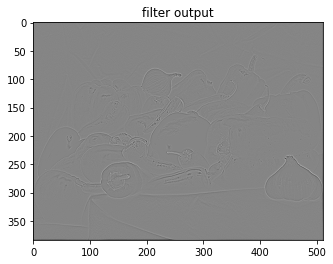

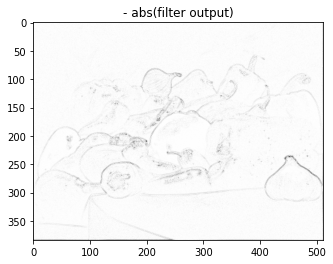

In [ ]:
w = torch.FloatTensor([[0,  1, 0 ],
                      [1, -4, 1 ],
                      [0,  1, 0 ]]) 
w = w.repeat(3, 1).reshape(1, 3, 3, 3)
conv_lap = torch.nn.Conv2d(3, 3, kernel_size=3, stride=1, padding=1, bias=False)
conv_lap.weight = torch.nn.Parameter(w) 
y_lap = conv_lap(x)
print(x.size())
print(y_lap.size())

plt.figure()
vis_features(y_lap)
plt.title('filter output')

plt.figure()
vis_features(-torch.abs(y_lap))
plt.title('- abs(filter output)') ;


### :: TASK 2.1 ::
* i. What filter have we implemented?
* ii. How are the RGB colour channels processed by this filter?
* iii. What image structure are detected?

######################

- For each of the 3 slices of the filter, we used the Discrete Laplacian that can be given as convolution with the following kernel :
$$
D_{xy}^2 = 
\begin{bmatrix}
0 & 1 & 0 \\
1 & -4 & 1 \\
0 & 1 & 0
\end{bmatrix}
$$
- Each slice of the filter is applied on each of the 3 RGB channels of the image, the 3 outputs are then summed.
- The edges in the image are detected using this filter.

######################


## Non-linear activation functions

The simplest non-linearity is obtained by following a linear filter by a *non-linear activation function*, applied identically to each component (i.e. point-wise) of a feature map. The simplest such function is the *Rectified Linear Unit (ReLU)*
$$
  y_{ijk} = \max\{0, x_{ijk}\}.
$$
This function is implemented by [`torch.nn.ReLU()`](https://pytorch.org/docs/stable/nn.html#torch.nn.ReLU). Run the code below and understand what the filter $\mathbf{w}$ is doing.


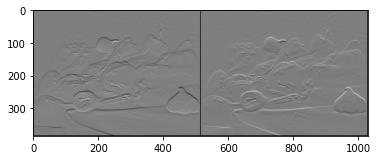

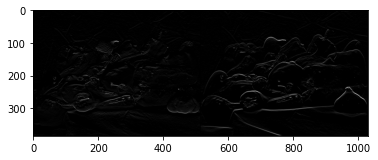

In [ ]:
w = torch.FloatTensor([[1], [0], [-1]]).repeat(1, 3, 1, 1)
w = torch.cat((w, -w), 0)

conv = torch.nn.Conv2d(3, 2, kernel_size=(3, 1), stride=1, padding=0, bias=False)
conv.weight = torch.nn.Parameter(w)
relu = torch.nn.ReLU()

y = conv(x)
z = relu(y)

plt.figure()
vis_features(y)
plt.figure()
vis_features(z)

## Pooling
There are several other important operators in a CNN. One of them is *pooling*.  A pooling operator operates on individual feature channels, coalescing nearby feature values into one by the application of a suitable operator. Common choices include max-pooling (using the max operator) or sum-pooling (using summation). For example, *max-pooling* is defined as:
$$
   y_{ijk} = \max \{ y_{i'j'k} : i \leq i' < i+p, j \leq j' < j + p \}
$$
Max-pooling is implemented by [`torch.nn.MaxPool2d()`](https://pytorch.org/docs/stable/nn.html#torch.nn.MaxPool2d).

### :: TASK 2.2 ::

Run the code below to try max-pooling. Look at the resulting image. Can you interpret the result?

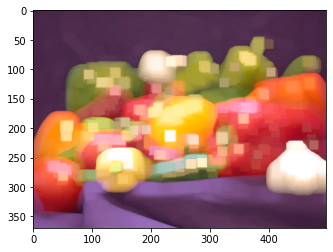

In [ ]:
mp = torch.nn.MaxPool2d(15, stride=1)
y = mp(x)
plt.imshow(y.squeeze().permute(1, 2, 0).numpy())
plt.gca().grid(False)

###################### <br>
When maxpooling, the maximum value of pixels is taken at each window of size **15*15** pixels in the image. <br> This is visible on the image by the small uniform-pixel areas on the image of size **15*15**. <br> Many of this areas are almost white-colored area, because white (255,255,255) corresponds to the maximum value of pixels in each channel.

######################

# Part 3 - Training a CNN

This part is an introduction to using PyTorch for training simple neural net models. CIFAR-10 dataset will be used.

## Imports

In [ ]:
from __future__ import print_function
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torchvision import datasets, transforms
from torch.autograd import Variable


GPU = True
if GPU and torch.cuda.is_available():
    device = torch.device('cuda')
else:
    device = torch.device('cpu')
    
print("Using : %s" %str(device))

Using : cuda


## Parameters

The default values for the learning rate, batch size and number of epochs are given in the "options" cell of this notebook. 
Unless otherwise specified, use the default values throughout this assignment. 

In [ ]:
batch_size = 64   # input batch size for training
epochs = 10       # number of epochs to train
lr = 0.01         # learning rate

## Warmup





It is always good practice to visually inspect your data before trying to train a model, since it lets you check for problems and get a feel for the task at hand.

CIFAR-10 is a dataset of 60,000 color images (32 by 32 resolution) across 10 classes
(airplane, automobile, bird, cat, deer, dog, frog, horse, ship, truck). 
The train/test split is 50k/10k.

In [ ]:
# Data Loading
# Warning: this cell might take some time when you run it for the first time, 
#          because it will download the dataset from the internet
dataset = 'cifar10'
data_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5)),
])
trainset = datasets.CIFAR10(root='.', train=True, download=True, transform=data_transform)
testset = datasets.CIFAR10(root='.', train=False, download=True, transform=data_transform)

train_loader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True, num_workers=0)
test_loader  = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False, num_workers=0)

Extracting ./cifar-10-python.tar.gz to .
Files already downloaded and verified


### :: TASK 3.1 ::

Use `matplotlib` and ipython notebook's visualization capabilities to display some of these images. Display 5 images from the dataset together with their category label. [See this PyTorch tutorial page](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#sphx-glr-beginner-blitz-cifar10-tutorial-py) for hints on how to achieve this.

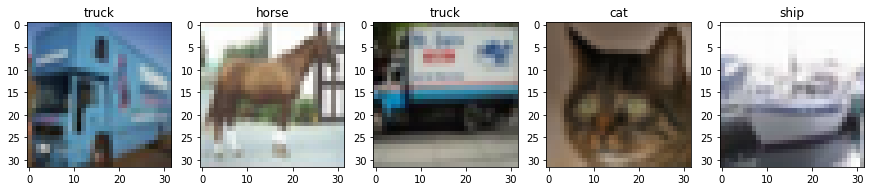

In [ ]:
random_indexes = np.random.randint(len(trainset),size=5)

def imshow(img):
    x = img.clone()
    x = x/2 + 0.5 #unnormalize
    x = x.numpy()
    x = np.transpose(x, (1,2,0))
    return x
    

classes = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']


fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(15,15))

for (i,ax) in enumerate(axs.reshape(-1)): 
  img, label = trainset[random_indexes[i]]

  ax.imshow(imshow(img))
  ax.title.set_text(classes[label])
plt.show()


## Training a Convolutional Network on CIFAR-10




Start by running the provided training code below. By default it will train on CIFAR-10 for 10 epochs (passes through the training data) with a single layer network. The loss function [cross_entropy](http://pytorch.org/docs/master/nn.html?highlight=cross_entropy#torch.nn.functional.cross_entropy) computes a Logarithm of the Softmax on the output of the neural network, and then computes the negative log-likelihood w.r.t. the given `target`. Note the decrease in training loss and corresponding decrease in validation errors.

In [ ]:
def train(epoch, network):
    network.train()
    for batch_idx, (data, target) in enumerate(train_loader):
        optimizer.zero_grad()

        #train on gpu 
        data = data.to(device) # train on gpu
        target = target.to(device)


        output = network(data)
        loss = F.cross_entropy(output, target)
        loss.backward()
        optimizer.step()
        if batch_idx % 100 == 0:
            print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                epoch, batch_idx * len(data), len(train_loader.dataset),
                100. * batch_idx / len(train_loader), loss.item()))

def test(network):
    network.eval()
    test_loss = 0
    correct = 0
    for data, target in test_loader:

      #test on gpu
      data = data.to(device)
      target = target.to(device)
      
      output = network(data)
      test_loss += F.cross_entropy(output, target, size_average=False).item() # sum up batch loss
      pred = output.data.max(1, keepdim=True)[1] # get the index of the max log-probability
      correct += pred.eq(target.data.view_as(pred)).cpu().sum()

    test_loss /= len(test_loader.dataset)
    print('\nTest set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
        test_loss, correct, len(test_loader.dataset),
        100. * correct / len(test_loader.dataset)))

In [ ]:
# Single layer network architecture

class Net(nn.Module):
    def __init__(self, num_inputs, num_outputs):
        super(Net, self).__init__()
        self.linear = nn.Linear(num_inputs, num_outputs)
        self.num_inputs = num_inputs
        
    def forward(self, input):
        input = input.view(-1, self.num_inputs) # reshape input to batch x num_inputs
        output = self.linear(input)
        return output

In [ ]:
# Train
network = Net(3072, 10).to(device)
optimizer = optim.SGD(network.parameters(), lr=lr)
#train on gpu for faster training
network.to(device)
for epoch in range(1, 11):
    train(epoch, network)
    test(network)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.327556
Train Epoch: 1 [6400/50000 (13%)]	Loss: 1.836396
Train Epoch: 1 [12800/50000 (26%)]	Loss: 1.907441
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.759791
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.689190
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.752140
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.707020
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.839815


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 1.8143, Accuracy: 3676/10000 (37%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.847726
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.879552
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.753381
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.533012
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.606258
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.956514
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.643949
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.595334

Test set: Average loss: 1.7493, Accuracy: 3979/10000 (40%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.909353
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.636659
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.517240
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.712235
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.987899
Train Epoch: 3 [32000/50000 (64%)]	Loss: 1.689167
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.614919
Train Epoch: 3 [44800/50000 (90%)]	Loss: 1.714728

Test set: Average loss: 1.7467, Accuracy: 3948/10000 (39%)

Train Epoch: 4 [0/50000 (0%)]

### :: TASK 3.2 ::

Add code to create a convolutional network architecture as below.

  - Convolution with 5 by 5 filters, 16 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Convolution with 5 by 5 filters, 128 feature maps + Tanh nonlinearity.
  - 2 by 2 max pooling.
  - Flatten to vector.
  - Linear layer with 64 hidden units + Tanh nonlinearity.
  - Linear layer to 10 output units.

In [ ]:
class ConvNet(nn.Module):    
    def __init__(self):
        super(ConvNet, self).__init__()
        #kernel
        self.conv1 = nn.Conv2d(3, 16, kernel_size=5 , stride=1, padding=0, bias=False)
        self.conv2 = nn.Conv2d(16, 128, kernel_size=5 , stride=1, padding=0, bias=False)
        
        #
        self.fc1 = nn.Linear(128*5*5, 64, bias = False)
        self.fc2 = nn.Linear(64, 10, bias=False)
        
        
    def forward(self, x):
      #convolution1 + tanh nonlinearity
      x = nn.Tanh()(self.conv1(x))
      #max pooling over a (2,2) window
      x = F.max_pool2d(x,(2,2))
      #convolution2 + tanh nonlinearity
      x = nn.Tanh()(self.conv2(x))
      #max pooling over a (2,2) window
      x = F.max_pool2d(x,(2,2))
      #flatten
      x = x.view(-1, self.num_flat_features(x))
      #Linear layer + tanh non linearity
      x= nn.Tanh()(self.fc1(x))
      #linear layers to 10 outputs units
      x = self.fc2(x)
      return x
        
    def num_flat_features(self, x):
      size = x.size()[1:]  # all dimensions except the batch dimension
      num_features = 1
      for s in size:
          num_features *= s
      return num_features

### :: TASK 3.3 ::

Some of the functions in a CNN must be non-linear. Why?





###################### <br>
If no non-linear function is used in a CNN, the network ends up computing a simple linear combination of the inputs (regardless of the number of convolution layers). This means that deep networks like CNNS are useless in this case. 

######################

### :: TASK 3.4 ::
Train the CNN for 20 epochs on the CIFAR-10 training set.



In [ ]:
# Train
network=ConvNet()
optimizer = optim.SGD(network.parameters(), lr=lr)
network.to(device)
for epoch in range(1, 21):
    train(epoch, network)
    test(network)

Train Epoch: 1 [0/50000 (0%)]	Loss: 2.294537
Train Epoch: 1 [6400/50000 (13%)]	Loss: 2.058312
Train Epoch: 1 [12800/50000 (26%)]	Loss: 2.018831
Train Epoch: 1 [19200/50000 (38%)]	Loss: 1.949790
Train Epoch: 1 [25600/50000 (51%)]	Loss: 1.880002
Train Epoch: 1 [32000/50000 (64%)]	Loss: 1.914805
Train Epoch: 1 [38400/50000 (77%)]	Loss: 1.677668
Train Epoch: 1 [44800/50000 (90%)]	Loss: 1.792881


/usr/local/lib/python3.6/dist-packages/torch/nn/_reduction.py:44: UserWarning: size_average and reduce args will be deprecated, please use reduction='sum' instead.
  warnings.warn(warning.format(ret))



Test set: Average loss: 1.8197, Accuracy: 3655/10000 (37%)

Train Epoch: 2 [0/50000 (0%)]	Loss: 1.848689
Train Epoch: 2 [6400/50000 (13%)]	Loss: 1.902398
Train Epoch: 2 [12800/50000 (26%)]	Loss: 1.704145
Train Epoch: 2 [19200/50000 (38%)]	Loss: 1.667213
Train Epoch: 2 [25600/50000 (51%)]	Loss: 1.779771
Train Epoch: 2 [32000/50000 (64%)]	Loss: 1.667377
Train Epoch: 2 [38400/50000 (77%)]	Loss: 1.842277
Train Epoch: 2 [44800/50000 (90%)]	Loss: 1.662298

Test set: Average loss: 1.6585, Accuracy: 4175/10000 (42%)

Train Epoch: 3 [0/50000 (0%)]	Loss: 1.710334
Train Epoch: 3 [6400/50000 (13%)]	Loss: 1.696850
Train Epoch: 3 [12800/50000 (26%)]	Loss: 1.631371
Train Epoch: 3 [19200/50000 (38%)]	Loss: 1.603615
Train Epoch: 3 [25600/50000 (51%)]	Loss: 1.540225
Train Epoch: 3 [32000/50000 (64%)]	Loss: 1.529239
Train Epoch: 3 [38400/50000 (77%)]	Loss: 1.474246
Train Epoch: 3 [44800/50000 (90%)]	Loss: 1.583235

Test set: Average loss: 1.5722, Accuracy: 4496/10000 (45%)

Train Epoch: 4 [0/50000 (0%)]

### :: TASK 3.5 ::
Plot the first convolutional layer weights as images after the last epoch. (Hint threads: [#1](https://discuss.pytorch.org/t/understanding-deep-network-visualize-weights/2060/2?u=smth) [#2](https://github.com/pytorch/vision#utils) )


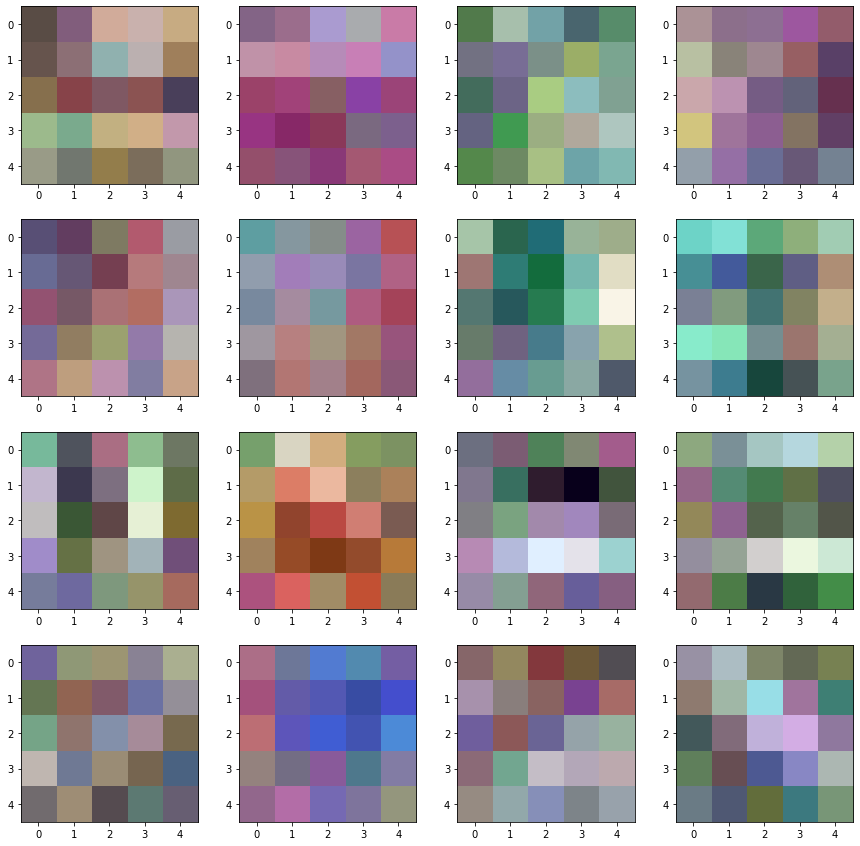

In [ ]:
#we load the network to cpu, as gpu is no longer needed
network.to('cpu')
# retrieve weights from the first convolutional layer
weights = network.conv1.weight
# normalize weights values to 0-1 so we can visualize them
w_min, w_max = weights.min(), weights.max()
weights = (weights - w_min) / (w_max - w_min)

# plot the 16 weights matrices in a 4x4 grid
fig, axs = plt.subplots(nrows=4, ncols=4, figsize=(15,15))

for (i,ax) in enumerate(axs.reshape(-1)): 
  #weight matrix
  w = weights[i]
  #transpose the weight matrix to a shape (5,5,3): numbers of channels should be at the end
  w = torch.transpose(w,0,2)
  #transform the pytorch tensor to numpy and plot it
  ax.imshow(w.detach().numpy())
plt.show()


### :: TASK 3.6 :: 

What is the dimensionality of the weights at each layer? How many parameters are there in total in this CNN architecture?

###################### <br>
It's important to note that there in no bias parameters in the model, so the weights consists only of filters. <br>
The dimensionality of weights at each layer is:<br>
- **Conv1** layer : $(16,3,5,5)$ : $16$ filters of dimensions $(3,5,5)$ 
- **Conv2** layer : $(128,16,5,5)$ : $128$ filters of dimension  $(16,5,5)$
- First Fully connected Layer **fc1** :  $(64,3200)$
- Second fully connected layer **fc2** :  $(10,64)$

Total number of parameters in This CNN architecture : $16*3*5*5+128*16*5*5+64*3200+10*64 = 257840$ parameters.

######################



## Useful resources

  - [PyTorch tutorial](http://pytorch.org/tutorials/beginner/blitz/neural_networks_tutorial.html#sphx-glr-beginner-blitz-neural-networks-tutorial-py)
  - [MNIST example](https://github.com/pytorch/examples/tree/master/mnist)

## AUTHORSHIP STATEMENT

I declare that the preceding work was the sole result of my own effort and that I have not used any code or results from third-parties.

Ghassen BETTAIEB